## Customer Analysis Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 100

### Functions

In [2]:
def clean_gender(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ["F", "female","Femal"]:
        return 'F'
    else:
        return 'U'
    
def replace_state(ca_df):
    ca_df["state"].replace({'Cali':'California', "AZ" : "Arizona", "WA":"Washington"}, inplace=True )
    return ca_df

def replace_income(ca_df):
    ca_df["income"].replace({0: np.mean(ca_df['income'])}, inplace=True )
    return ca_df

def replace_clv(ca_df): 
    ca_df["CLV"].replace({0: np.mean(ca_df['CLV']), np.nan : np.mean(ca_df['CLV'])}, inplace=True )
    return ca_df

def replace_zone(ca_df):
    ca_df["state"].replace({'California':'West Region', "Oregon" : "North West", "Washington":"East", "Arizona":"Central","Nevada":"Central"}, inplace=True )
    return ca_df

def lower_case_column_names(ca_df):
    ca_df.columns=[i.lower() for i in ca_df.columns]
    return ca_df

## Activity 1 (Monday)

- Aggregate data into one Data Frame using Pandas. Pay attention that files may have different names for the same column. therefore, make sure that you unify the columns names before concating them.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.
- Clean the number of open complaints and extract the middle number which is changing between records. pay attention that the number of open complaints is a categorical feature.
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates


## Importing data

In [3]:
file1 = pd.read_csv('LAB EDA Round file 1.csv')
file2 = pd.read_csv('LAB EDA Round file 2.csv')
file3 = pd.read_csv('LAB EDA Round file 3.csv')

In [4]:
file1

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ca_df = pd.concat([file1,file2,file3],axis = 0, sort=False)

In [6]:
ca_df = ca_df.reset_index(drop=True)

In [7]:
ca_df

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [8]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   CLV                        9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 943.4+ KB


In [9]:
ca_df['gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [10]:
ca_df.gender.value_counts(dropna=False)

F         4560
M         4368
NaN       3059
Male        40
female      30
Femal       17
Name: gender, dtype: int64

## Using Clean_gender() Function to format gender data

In [11]:
ca_df['gender'] = list(map(clean_gender, ca_df['gender'])) 

In [12]:
ca_df.gender.value_counts(dropna=False)

F    4607
M    4408
U    3059
Name: gender, dtype: int64

## Deleting "%" from Customer Lifetime Value

In [13]:
ca_df['CLV'] = ca_df['CLV'].str.strip("%")

In [14]:
ca_df

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,NaN,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,NaN,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,NaN,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,NaN,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Changing the CLV from categorical values to numerical values

In [15]:
ca_df['CLV'] = pd.to_numeric(ca_df["CLV"], errors ="coerce")

In [16]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     12074 non-null  object 
 2   education                  9137 non-null   object 
 3   CLV                        2060 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(4), object(6)
memory usage: 943.4+ KB


## Extracting the middle number of number of open complaints

In [17]:
ca_df["number of open complaints"]= ca_df["number of open complaints"].apply(lambda x: x.split('/')[1] if type(x)==str else x)

In [18]:
ca_df["number of open complaints"]

0        0
1        0
2        0
3        0
4        0
        ..
12069    0
12070    0
12071    3
12072    0
12073    0
Name: number of open complaints, Length: 12074, dtype: object

In [19]:
ca_df['number of open complaints'] = pd.to_numeric(ca_df['number of open complaints'],errors='coerce')

In [20]:
ca_df

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,U,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,NaN,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,NaN,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,NaN,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,NaN,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [21]:
ca_df.state.value_counts(dropna=False)

California    3032
NaN           2937
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

## Correcting typos of the states

In [22]:
replace_state(ca_df)

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,U,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,NaN,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,NaN,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,NaN,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,NaN,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [23]:
ca_df.state.value_counts(dropna=False)

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [24]:
ca_df.income.value_counts(dropna=False)

NaN        2937
0.0        2294
95697.0      13
10621.0       8
61108.0       8
           ... 
26599.0       1
75774.0       1
85412.0       1
42968.0       1
21941.0       1
Name: income, Length: 5656, dtype: int64

## Dropping Duplicates

In [25]:
ca_df.drop_duplicates(inplace=True)

## Activity 2 (Tuesday)

- Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values) Hint: numpy.nan is considered of float64 data type.
- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

## Filling NaN cells with average income

In [26]:
mean_income = np.mean(ca_df['income'])
ca_df['income'] = ca_df['income'].fillna(mean_income)

In [27]:
replace_income(ca_df)

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,U,Master,NaN,37928.214399,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,37928.214399,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.000000,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,37928.214399,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.000000,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,NaN,71941.000000,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,NaN,21604.000000,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,NaN,37928.214399,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,NaN,21941.000000,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Filling CLV NaN cells with the average CLV

In [28]:
replace_clv(ca_df)

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,U,Master,7.794818e+05,37928.214399,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6.979536e+05,37928.214399,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1.288743e+06,48767.000000,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7.645862e+05,37928.214399,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5.363077e+05,36357.000000,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,7.794818e+05,71941.000000,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,7.794818e+05,21604.000000,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,7.794818e+05,37928.214399,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7.794818e+05,21941.000000,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Renaming states to zones

In [29]:
replace_zone(ca_df)

,state,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,East,U,Master,7.794818e+05,37928.214399,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Central,F,Bachelor,6.979536e+05,37928.214399,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Central,F,Bachelor,1.288743e+06,48767.000000,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,West Region,M,Bachelor,7.645862e+05,37928.214399,106.0,0.0,Corporate Auto,SUV,529.881344
4,East,M,High School or Below,5.363077e+05,36357.000000,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,West Region,M,Bachelor,7.794818e+05,71941.000000,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,West Region,F,College,7.794818e+05,21604.000000,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,West Region,M,Bachelor,7.794818e+05,37928.214399,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,West Region,M,College,7.794818e+05,21941.000000,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [30]:
ca_df.rename(columns={"state":"zone"}, inplace=True)

In [31]:
ca_df

,zone,gender,education,CLV,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,East,U,Master,7.794818e+05,37928.214399,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Central,F,Bachelor,6.979536e+05,37928.214399,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Central,F,Bachelor,1.288743e+06,48767.000000,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,West Region,M,Bachelor,7.645862e+05,37928.214399,106.0,0.0,Corporate Auto,SUV,529.881344
4,East,M,High School or Below,5.363077e+05,36357.000000,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,West Region,M,Bachelor,7.794818e+05,71941.000000,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,West Region,F,College,7.794818e+05,21604.000000,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,West Region,M,Bachelor,7.794818e+05,37928.214399,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,West Region,M,College,7.794818e+05,21941.000000,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Activity 3 (Wednesday)

- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
        - Use seaborn library to construct distribution plots for the numerical variables
        - Use Matplotlib to construct histograms
        - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [32]:
filename = "Data_Marketing_Customer_Analysis_Round3.csv"
ca_df2 = pd.read_csv(filename, index_col=False)

In [33]:
ca_df2 = ca_df2.reset_index(drop=True)

In [34]:
ca_df2

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Getting numeric data

In [35]:
num_val = ca_df2._get_numeric_data()

In [36]:
num_val

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


## Getting Categorical data

In [37]:
cat_val = ca_df2.select_dtypes(include="object")

In [38]:
cat_val

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


C:\Users\Mauricio\anaconda3\envs\DA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

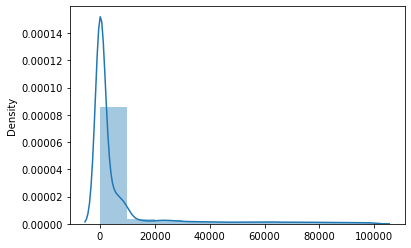

In [39]:
sns.distplot(num_val, bins= 10)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

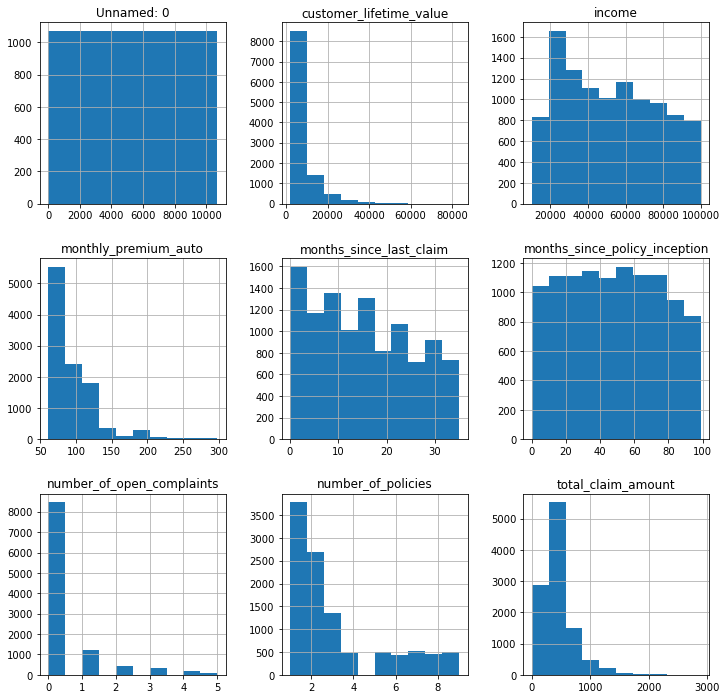

In [40]:
ca_df2.hist(figsize=(12,12))

In [41]:
pt = PowerTransformer()

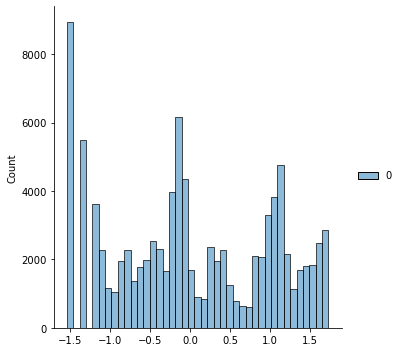

In [42]:
val_transformed=pt.fit_transform(ca_df2._get_numeric_data().to_numpy().reshape(-1,1))
sns.displot(val_transformed)

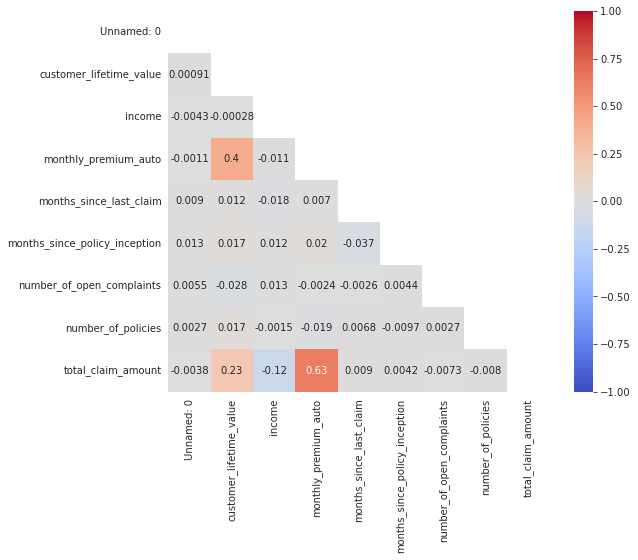

In [43]:
corr = ca_df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [44]:
ca_df3 = pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [45]:
ca_df3['Total Claim Amount']

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

In [46]:
ca_df3.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [47]:
ca_df3.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [48]:
lower_case_column_names(ca_df3).head() # make headers uniformly lower case
ca_df3.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

C:\Users\Mauricio\anaconda3\envs\DA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

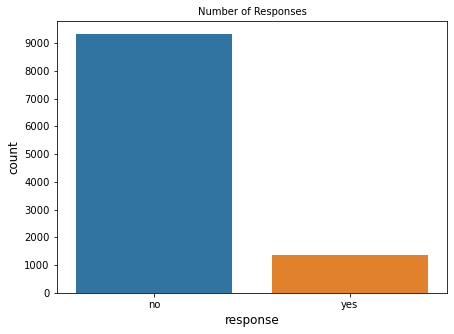

In [49]:
plt.figure(figsize=(7,5))
#plt.subplot(2,2,1)
plt.title('Number of Responses', size='10')
plt.yticks(np.arange(0,10000,1000))
sns.countplot(ca_df2['response']) 
plt.xlabel('response',size=12)
plt.ylabel('count',size=12)

<AxesSubplot:title={'center':'Response by sales channel'}, xlabel='sales_channel', ylabel='count'>

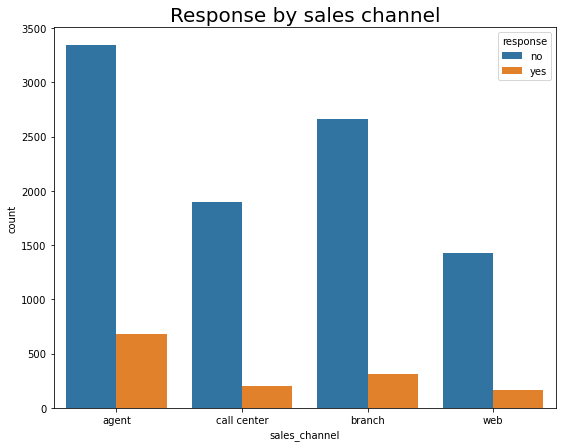

In [50]:
plt.figure(figsize=(9,7))
plt.title('Response by sales channel', size='20')

sns.countplot(x=ca_df2['sales_channel'], hue=ca_df2['response']) 

In [51]:
ca_df3['total claim amount'].max()

2893.239678

In [52]:
pd.cut(ca_df3['total claim amount'],4)

0          (-2.794, 723.384]
1        (723.384, 1446.669]
2          (-2.794, 723.384]
3          (-2.794, 723.384]
4          (-2.794, 723.384]
                ...         
10905    (723.384, 1446.669]
10906      (-2.794, 723.384]
10907      (-2.794, 723.384]
10908      (-2.794, 723.384]
10909    (723.384, 1446.669]
Name: total claim amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(-2.794, 723.384] < (723.384, 1446.669] < (1446.669, 2169.955] < (2169.955, 2893.24]]

In [53]:
723.384+2.794

726.178

In [54]:
pd.qcut(ca_df3['total claim amount'],[0, .25, .5, .75, 1.])

0        (271.083, 382.565]
1          (547.2, 2893.24]
2          (382.565, 547.2]
3          (382.565, 547.2]
4          (547.2, 2893.24]
                ...        
10905      (547.2, 2893.24]
10906    (271.083, 382.565]
10907    (271.083, 382.565]
10908      (547.2, 2893.24]
10909      (547.2, 2893.24]
Name: total claim amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(0.098, 271.083] < (271.083, 382.565] < (382.565, 547.2] < (547.2, 2893.24]]

Text(0, 0.5, 'count')

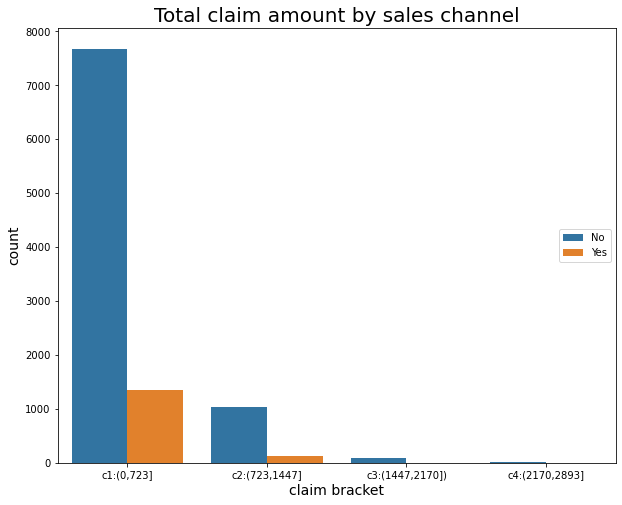

In [55]:
plt.figure(figsize=(10,8))
plt.title('Total claim amount by sales channel', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=pd.cut(ca_df3['total claim amount'],4,labels=['c1:(0,723]','c2:(723,1447]','c3:(1447,2170])','c4:(2170,2893]']), hue=ca_df3['response']) 
ax.set_xlabel('claim bracket', size=14)
plt.legend(loc='right')
plt.ylabel('count',size=14)

In [56]:
ca_df3['income'].max()

bins = [int(99981*x+.001) for x in [0,.25,.5,.75,1]]
bins = [0,25000,50000,75000,100000]
bins

[0, 25000, 50000, 75000, 100000]

In [57]:
income_cut = pd.cut(ca_df3['income'],bins, labels=['<25k','25k to 50k','50k to 75k','75k to 100k'],
                    duplicates='drop')#,include_lowest=True)

Text(0, 0.5, 'count')

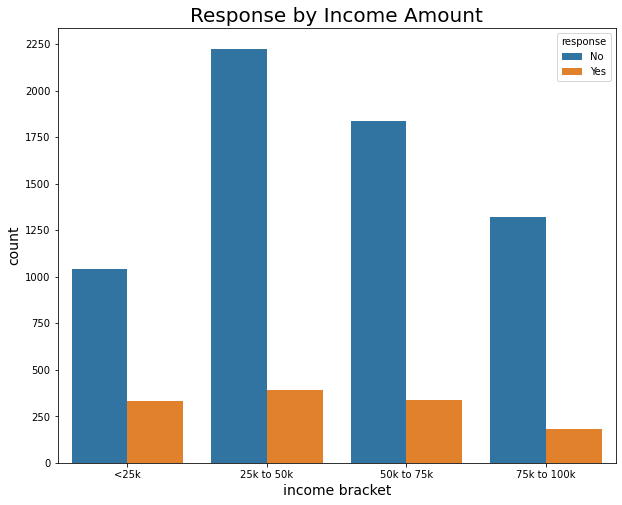

In [58]:
plt.figure(figsize=(10,8))
plt.title('Response by Income Amount', size='20')
#plt.xlabel('quartiles of total sales [2893]' )
ax = sns.countplot(x=income_cut, hue=ca_df3['response']) 
ax.set_xlabel('income bracket',size=14)
ax.set_yticks(np.arange(0,2500,250))
plt.ylabel('count',size=14)

In [59]:
numericals_df   = ca_df3.select_dtypes(include=np.number) # get numerical columns using the select_dtypes method
categoricals_df = ca_df3.select_dtypes(include=object)    # get cat columns  

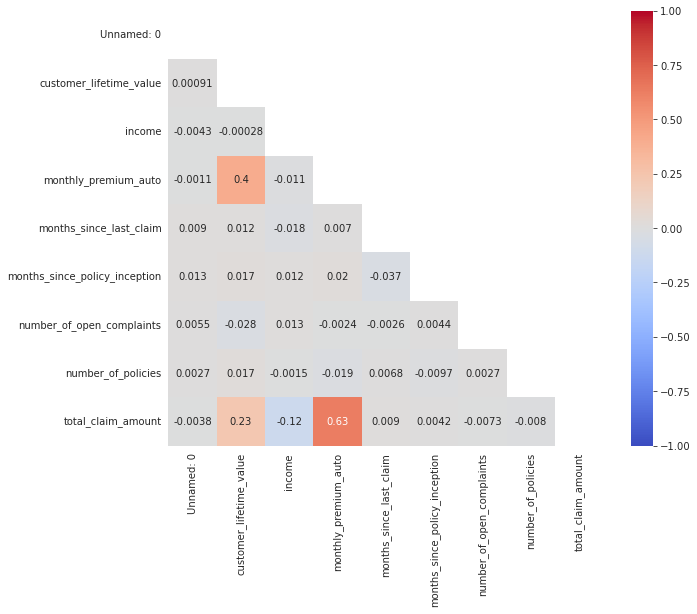

In [60]:
n_corr = num_val.corr()
mask = np.zeros_like(n_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(n_corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Activities List 21.06.22

#### check if there are highly correlated features and drop them if there are any.

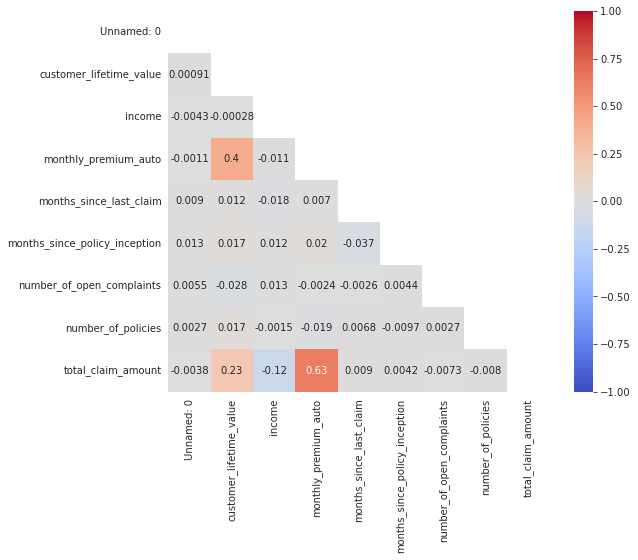

In [61]:
corr = ca_df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

#### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [62]:
cat_val=pd.get_dummies(cat_val, drop_first=True)
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

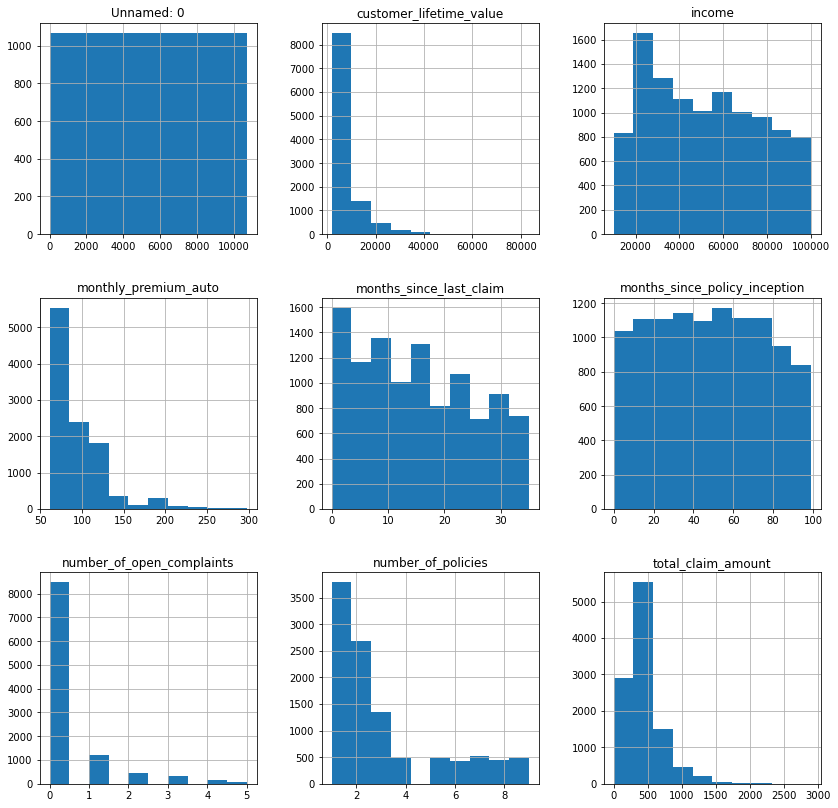

In [63]:
ca_df2.hist(figsize=(14,14))

In [64]:
num_val = ca_df2._get_numeric_data()
num_val = num_val.drop(['Unnamed: 0'], axis=1)
num_val

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [65]:
colnames_numerics_only = num_val.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

## Predictive Modeling

### X-y split (y is the target variable which is the total claim amount)

In [66]:
X=num_val.drop(['total_claim_amount'], axis=1)
y=num_val.total_claim_amount

In [67]:
#X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Data Splitting

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
print(X_train, X_test, y_train, y_test)

       customer_lifetime_value  income  monthly_premium_auto  \
6608                      7271   20545                    70   
5697                      5079   17922                    68   
10524                     4428   58577                   110   
397                      22332   49078                    97   
6324                      2430   67280                    70   
...                        ...     ...                   ...   
9785                      3086   73938                    76   
7763                      5658   78834                    72   
5218                      2434   23033                    62   
1346                     23594   76358                    66   
3582                     16236   51665                    74   

       months_since_last_claim  months_since_policy_inception  \
6608                        23                             86   
5697                         6                             95   
10524                        6      

### (optional) remove the outliers from the numerical columns.

In [69]:
num_val

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [70]:
ca_df2.describe()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,5344.000000,8011.906727,51757.468987,93.190196,15.140425,48.100571,0.387501,2.980821,434.227243
std,3085.792848,6877.557889,24967.653440,34.413111,10.075678,27.934300,0.914320,2.399497,292.550878
min,0.000000,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2672.000000,4014.000000,29095.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5344.000000,5776.000000,50144.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8016.000000,8991.000000,72517.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,10688.000000,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


To know which numerical variables we have to select to remove the outliers, we can visualize with boxplot the data and the outliers.

Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [71]:
Q1 = num_val.quantile(0.25)
Q3 = num_val.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

customer_lifetime_value           4977.0
income                           43422.0
monthly_premium_auto                41.0
months_since_last_claim             17.0
months_since_policy_inception       47.0
number_of_open_complaints            0.0
number_of_policies                   3.0
total_claim_amount                 278.0
dtype: float64


This tells us that the middle 50% of values in the dataset have a spread of $4977 for the customer lifetime_value and so on.
type(Q1)

The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [72]:
print(num_val < (Q1 - 1.5 * IQR)) |(num_val > (Q3 + 1.5 * IQR))

       customer_lifetime_value  income  monthly_premium_auto  \
0                        False   False                 False   
1                        False   False                 False   
2                        False   False                 False   
3                        False   False                 False   
4                        False   False                 False   
...                        ...     ...                   ...   
10684                    False   False                 False   
10685                    False   False                 False   
10686                    False   False                 False   
10687                    False   False                 False   
10688                    False   False                 False   

       months_since_last_claim  months_since_policy_inception  \
0                        False                          False   
1                        False                          False   
2                        False      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
num_val.boxplot(column='customer_lifetime_value')

In [ ]:
num_val.boxplot(column='customer_lifetime_value')

In [ ]:
num_val.boxplot(column='income')

In [ ]:
num_val.boxplot(column='monthly_premium_auto')

In [ ]:
num_val.boxplot(column='months_since_last_claim')

In [ ]:
num_val.boxplot(column='months_since_policy_inception')

In [ ]:
num_val.boxplot(column='total_claim_amount')

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
remove_outlier_IQR(num_val)

# Activity 2
(Wednesday)

1. Linear Regression
    1. Train-test split.(look in the activity 1)
    2. Standardize the data (after the data split).
    3. Apply linear regression.
    4. Model Interpretation.

## Linear Regression

### Standardize the data

In [ ]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled=std_scaler.transform(X_train)

In [ ]:
X_train.shape

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

### Apply linear regression.

####  Modeling using Scikit Learn

Model fitting

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

#### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [ ]:
print('The coefficients/parameters of the model are: ')
model.coef_

In [ ]:
print('The intercept value(b) of the model is: ')
model.intercept_

#### Model Interpretation

<b> array([ -6.73206342, -33.11725893, 187.88680342,   1.93370336,
        -0.87551921])
    
* 'customer_lifetime_value'= we can say that more negative is this values then the 'Total claim amount'is influenced.
* 'income',
* 'monthly_premium_auto',
* 'months_since_last_claim',
* 'months_since_policy_inception'

#### Making prediction

In [ ]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [ ]:
y_pred

In [ ]:
X

### Predicting on new data

In [ ]:
## new record 
new_data=[2000,2500,100,25,12,3,8]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

In [ ]:
np.array(np.array(new_data).reshape(-1,7)).shape

In [ ]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

## Model Validation - Evaluating Model Performance

In [ ]:
y_test

In [ ]:
y_pred

### Evaluating model with plots

#### Scatter plot y_pred vs y , histogram of the residuals and Residuals by Predicted

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

1. We have a 45 degrees, good alineation between the y_test and y_pred 
2. I look the y_test-y_predict, im showing the error with the histogram and we can see a normal distribution (my errors follow a normal distribution: normality of residuals), with mean 0, and maybe standard deviation
3. The errors of my predictions are, the variace, how the data is disperse; We can see the variance is constant=equivalente (orange line)

<b> more fancy using seaborn

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})

### Error metrics

#### MSE (Mean Square Error) & MAE(Mean Absolute Error)

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
##prediction on the train set
mse(y_train,y_pred_train)

#### R-Squared is also termed the standardized version of MSE

In [ ]:
%%html
<img src="R_Squared_Computation.png", width=600,height=600>

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.
Usually, the larger the R2, the better the regression model fits your observations.

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

###  getting the number of parameters 

In [ ]:
X_test.shape[1]

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#### Feature Importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Model Iteration (Thursday and Friday)

- Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
- Please rerun the model after removing the outliers and compare the results using R2 metric.


Hot Coded Categorical Values = cat_val - Done
- Now Hot Coding Numerical Values